# Yelp Aspect Based Sentiment Analysis

The goal is to perform an aspect based sentiment analysis on yelp reviews we have scraped. Once we have collected the aspects and sentiments, we will then need to summarize our findings. Our aspects need to be classified into predefined labels in order to determine restaraunt performance. We will then need to plot our findings to display the restaraunts most succesfull category and a few corresponding reviews as well as negative category.

Potential Features
* Have a section highlighting 3 star reviews since they are the least polarizing
* Take into account whether users are top reviewers in order to give their review higher value
* Allow for end-user to select their most important category as a dealbreaker

In [1]:
# Install pyabsa if it doesnt exist 
import os
import sys
packages_folder = '/kaggle/working/mysitepackages'
if not os.path.exists(packages_folder):
    !pip install pyabsa --target=/kaggle/working/mysitepackages

sys.path.append(packages_folder)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.7/521.7 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 727.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 88.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - \ done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 6.8 MB/s eta 

In [2]:
from pyabsa import AspectTermExtraction as ATEPC
checkpoint_location = '/kaggle/working/mysitepackages/pyabsa/checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip'
if os.path.exists(checkpoint_location):
    aspect_extractor = ATEPC.AspectExtractor(
    checkpoint=checkpoint_location)
else:
    aspect_extractor = ATEPC.AspectExtractor(
    checkpoint="english")

/opt/conda/lib/python3.7/site-packages/botocore/httpsession.py:41: DeprecationWarning: 'urllib3.contrib.pyopenssl' module is deprecated and will be removed in a future release of urllib3 2.x. Read more in this issue: https://github.com/urllib3/urllib3/issues/2680
  from urllib3.contrib.pyopenssl import orig_util_SSLContext as SSLContext


Version 0.8.7.4 of metric_visualizer is outdated. Version 0.9.6 was released Monday March 06, 2023.


/opt/conda/lib/python3.7/site-packages/mxnet/numpy/utils.py:37: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool = onp.bool
/opt/conda/lib/python3.7/site-packages/mxnet/numpy/fallback.py:143: DeprecationWarning: In accordance with NEP 32, the function mirr was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial library: https://pypi.org/project/numpy-financial
  mirr = onp.mirr
/opt/conda/lib/python3.7/site-packages/mxnet/numpy/fallback.py:160: DeprecationWarning: In accordance with NEP 32, the function npv was removed from NumPy version 1.20.  A replacement for this function is available in the numpy_financial libr

[2023-04-11 20:18:02] (2.0.27) PyABSA(2.0.27): 
[New Feature] Aspect Sentiment Triplet Extraction from v2.1.0 test version (https://github.com/yangheng95/PyABSA/tree/v2/examples-v2/aspect_sentiment_triplet_extration)
[New Feature] Aspect CategoryOpinion Sentiment Quadruple Extraction from v2.2.0 test version (https://github.com/yangheng95/PyABSA/tree/v2/examples-v2/aspect_opinion_sentiment_category_extraction)

If you find any problems, please report them on GitHub. Thanks!
The v2.x versions are not compatible with Google Colab. Please downgrade to 1.16.27.

[2023-04-11 20:18:02] (2.0.27) ********** Available ATEPC model checkpoints for Version:2.0.27 (this version) **********
[2023-04-11 20:18:02] (2.0.27) Downloading checkpoint:english 
[2023-04-11 20:18:02] (2.0.27) Notice: The pretrained model are used for testing, it is recommended to train the model on your own custom datasets


[2023-04-11 20:18:05] (2.0.27) Find zipped checkpoint: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip, unzipping


[2023-04-11 20:18:11] (2.0.27) Done.
[2023-04-11 20:18:12] (2.0.27) If the auto-downloading failed, please download it via browser: https://huggingface.co/spaces/yangheng/PyABSA/resolve/main/checkpoints/English/ATEPC/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43.zip 
[2023-04-11 20:18:12] (2.0.27) Load aspect extractor from ./checkpoints/ATEPC_ENGLISH_CHECKPOINT
[2023-04-11 20:18:12] (2.0.27) config: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.config
[2023-04-11 20:18:12] (2.0.27) state_dict: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.state_dict
[2023-04-11 20:18:12] (2.0.27) model: None
[2023-04-11 20:18:12] (2.0.27) tokenizer: ./checkpoints/ATEPC_ENGLISH_CHECKPOINT/fast_lcf_atepc_English_cdw_apcacc_82.36_apcf1_81.89_atef1_75.43/fast_lcf_atepc.tokenizer
[2023-04-11 20:18:12] (2.0.27) Set Model Device: cuda:0
[2023-04-11 

Some weights of the model checkpoint at microsoft/deberta-v3-base were not used when initializing DebertaV2Model: ['lm_predictions.lm_head.dense.bias', 'lm_predictions.lm_head.bias', 'mask_predictions.LayerNorm.bias', 'mask_predictions.classifier.bias', 'lm_predictions.lm_head.dense.weight', 'mask_predictions.dense.bias', 'mask_predictions.LayerNorm.weight', 'lm_predictions.lm_head.LayerNorm.bias', 'mask_predictions.dense.weight', 'mask_predictions.classifier.weight', 'lm_predictions.lm_head.LayerNorm.weight']
- This IS expected if you are initializing DebertaV2Model from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaV2Model from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
/opt/conda/lib/python3.7/site-packages/transformers/convert_slow_tokenizer.py:447: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


# Load Data

Using yelp review data I scraped from my favorite sushi restaurant, Hide sushi in los angeles 

In [3]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
file = '/kaggle/input/hidesushis/hidesushi.json'

with open(file) as train_file:
    dict_train = json.load(train_file)
review_data = pd.DataFrame.from_dict(dict_train)

In [4]:
review_data

,author,content,rating,date
0,Jim Y.,"This is my favorite restaurant in all of LA, b...",5 star rating,10/12/2012
1,Andrea L.,Thinking about this place makes my mouth water...,5 star rating,10/11/2012
2,Vanessa M.,Came here for the first time after seeing grea...,4 star rating,10/11/2012
3,Sean P.,EPIC. That pretty much sums up my review for H...,5 star rating,10/8/2012
4,Laurie V.,This is my go-to sushi restaurant time and tim...,5 star rating,10/5/2012
...,...,...,...,...
1674,Paul D.,Kitano-San! I hope you will be able to do take...,5 star rating,2/13/2021
1675,Tyler F.,HIDE is THE hidden sushi gem of Los Angeles!! ...,5 star rating,2/1/2021
1676,Susan R.,I've been coming here for 50 years! I remember...,5 star rating,1/28/2021
1677,Ian M.,Really awesome sushi spot. It's one of those ...,5 star rating,12/30/2020


### Cleanup review rating 

In [5]:
def clean(x):
    return x.split()[0]
review_data['rating'] = review_data['rating'].apply(lambda x : clean(x))

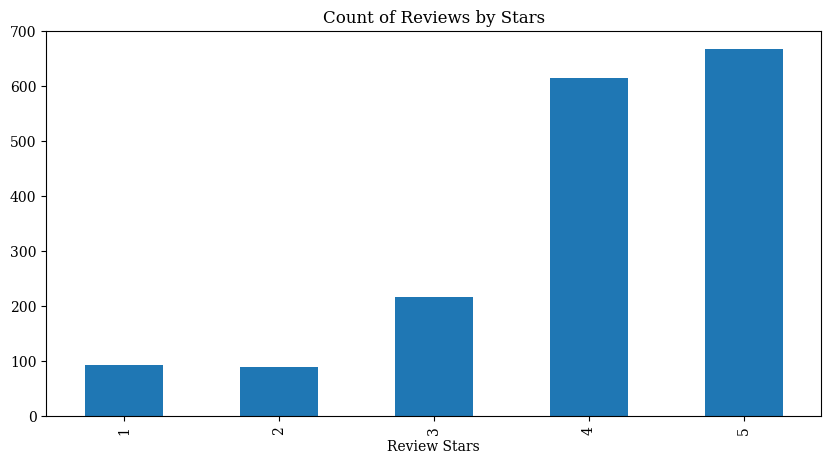

In [6]:
#Display review rating distribution

ax = review_data['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [7]:
review_data

,author,content,rating,date
0,Jim Y.,"This is my favorite restaurant in all of LA, b...",5,10/12/2012
1,Andrea L.,Thinking about this place makes my mouth water...,5,10/11/2012
2,Vanessa M.,Came here for the first time after seeing grea...,4,10/11/2012
3,Sean P.,EPIC. That pretty much sums up my review for H...,5,10/8/2012
4,Laurie V.,This is my go-to sushi restaurant time and tim...,5,10/5/2012
...,...,...,...,...
1674,Paul D.,Kitano-San! I hope you will be able to do take...,5,2/13/2021
1675,Tyler F.,HIDE is THE hidden sushi gem of Los Angeles!! ...,5,2/1/2021
1676,Susan R.,I've been coming here for 50 years! I remember...,5,1/28/2021
1677,Ian M.,Really awesome sushi spot. It's one of those ...,5,12/30/2020


### Filter Out Dates older than 2020

In [8]:
review_data['date'] = pd.to_datetime(review_data['date'])
#review_data['date'] = review_data['date'].astype('datetime64[ns]')
review_data = review_data[review_data['date'].dt.year > 2020]

In [9]:
review_data

,author,content,rating,date
140,Monica M.,By far our favorite place for sushi on Sawtell...,5,2023-01-20
141,Natalie G.,Love Sushi Hide!! Used to go many many years a...,5,2022-12-31
142,Matthew M.,My favorite Sushi Restaraunt in Los Angeles. Y...,5,2022-12-10
143,Prada P.,Made some changes to their restaurant. Renova...,5,2022-11-30
144,Henry J.,Food quantity is not good and too long waiting...,1,2022-11-27
...,...,...,...,...
1672,linda s.,Hide we miss you. You have been a once a week...,5,2021-02-22
1673,Adriel Y.,We miss coming to HIde and seeing all the staf...,5,2021-02-20
1674,Paul D.,Kitano-San! I hope you will be able to do take...,5,2021-02-13
1675,Tyler F.,HIDE is THE hidden sushi gem of Los Angeles!! ...,5,2021-02-01


# Reviews Over Time

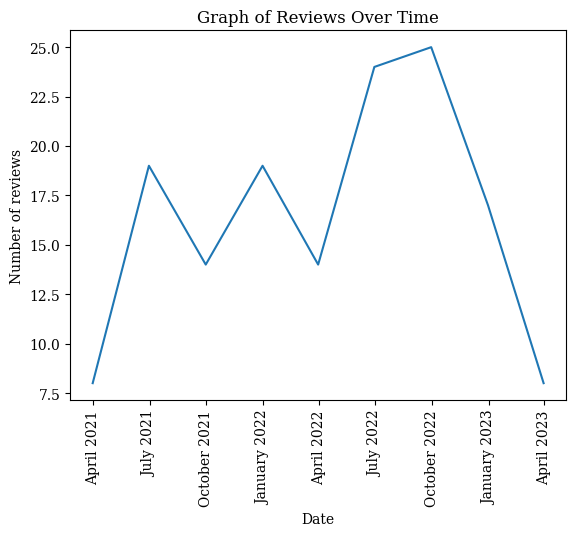

In [10]:
import matplotlib.dates as mdates
review_data.dtypes
review_data = review_data.set_index('date')

fig,ax1 = plt.subplots()
monthyearFmt = mdates.DateFormatter('%B %Y')
ax1.xaxis.set_major_formatter(monthyearFmt)
_ = plt.xticks(rotation=90)
plt.plot(review_data['rating'].resample('Q', convention='start').count())
plt.xlabel('Date')
plt.ylabel('Number of reviews')
plt.title('Graph of Reviews Over Time')

plt.show()

# Sentence Cleaning

In [11]:
import re
cleanup_re = re.compile('[^a-z.]+')
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    #sentence = " ".join(nltk.word_tokenize(sentence))
    return sentence


In [12]:
#Cleanup all
arr = []
for itm in review_data['content']:
    curr = cleanup(itm)
    arr.append([x.strip() for x in curr.split('.')])
    
   

In [13]:
len(arr)

148

### Write Reviews to File for Batch Prediction

In [14]:
#we want to capture our initial ratings
initial_ratings = []
sentence_list = []
review_index = []
import re
with open('check.inference', 'w') as the_file:
    for idx,array in enumerate(arr):
        for line in array:
            curr  = line.strip()
            if curr != '' and len(curr) > 6:
                initial_ratings.append(int(review_data['rating'][idx]))
                s = re.sub(r'[^A-Za-z0-9 ]+', '', line)
                sentence_list.append(s)
                review_index.append(idx)
                the_file.write(s + '\n')
                
                
                

                
            
                


In [15]:
# This validated my suspicion that duplicate sentences are being tossed out
from collections import Counter
test_dict = Counter(sentence_list)
count = 0
for x,y in test_dict.items():
    if y > 1:
        count += y-1
count

24

# Perform Batch Prediction

In [16]:
result = []
import time
start_time = time.perf_counter()
result = aspect_extractor.batch_predict(
    target_file='/kaggle/working/check.inference',
    print_result=False,
    save_result=False,
    ignore_error=True,
    eval_batch_size=16,
)
finish_time = time.perf_counter()

[2023-04-11 20:18:25] (2.0.27) loading: /kaggle/working/check.inference


preparing apc inference dataloader: 100%|██████████| 1096/1096 [00:02<00:00, 512.24it/s]
/kaggle/working/mysitepackages/pyabsa/tasks/AspectTermExtraction/prediction/aspect_extractor.py:571: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /usr/local/src/pytorch/torch/csrc/utils/tensor_new.cpp:230.)
  [f.lcf_cdm_vec for f in infer_features], dtype=torch.float32
classifying aspect sentiments:   0%|          | 0/69 [00:00<?, ?it/s]/kaggle/working/mysitepackages/pyabsa/tasks/AspectTermExtraction/prediction/aspect_extractor.py:651: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  float(x) for x in F.softmax(i_apc_logits).cpu().numpy().tolist()
classifying aspect sentiments: 100%|██████████| 69/69 [00:20<00:00,  3.33it/s]


In [17]:

print("Aspect Sentiment Analysis finished in {} seconds".format(finish_time-start_time))
print("---")

Aspect Sentiment Analysis finished in 43.31277322899996 seconds
---


In [18]:
# Results into DataFrame
#result_df = pd.DataFrame(result, columns = ['sentence','aspect', 'sentiment'])
############## add the ratings here with review_data
#result_df['ratings'] = initial_ratings
sentence_indx_dict = {}
for item in result:
    sentence_indx_dict[item['sentence']] = item
built_out_list = []
for idx,sentence in enumerate(sentence_list):
    curr = sentence_indx_dict[sentence]
    built_out_list.append((review_index[idx],curr['sentence'],curr['aspect'],curr['sentiment'],initial_ratings[idx]))

result_df = pd.DataFrame(built_out_list, columns = ['review_idx', 'sentence','aspect', 'sentiment','rating'])    
    



In [19]:
# If no aspect found then drop the row
result_df = result_df[result_df['aspect'].str.len() != 0]
# Reindex into sequential order
result_df = result_df.reset_index(drop=True)

In [20]:
result_df

,review_idx,sentence,aspect,sentiment,rating
0,0,by far our favorite place for sushi on sawtell...,"[sushi, meal]","[Positive, Positive]",5
1,0,sushi is always fresh and delicious,[sushi],[Positive],5
2,0,it gets a little crowded because many people a...,[waiting],[Negative],5
3,0,the dining room is a touch small but i promise...,"[dining room, wait]","[Negative, Positive]",5
4,0,the service is great,[service],[Positive],5
...,...,...,...,...,...
733,145,where else would i go save seat for me,[seat],[Neutral],5
734,146,hide is the hidden sushi gem of los angeles th...,"[sushi, fish, fish market]","[Neutral, Positive, Neutral]",5
735,147,i ve been coming here for years i remember whe...,[place],[Neutral],5
736,147,this restaurant is one of las best,[restaurant],[Positive],5


## 

In [21]:


def process_data(result_df):
    sentence_idx_list = []
    rating_list = []
    review_idx_list = []
    for i, row in result_df.iterrows():
        for _ in row['aspect']:
            sentence_idx_list.append(i)
            rating_list.append(row['rating'])
            review_idx_list.append(row['review_idx'])
    aspects = list(result_df['aspect'])
    sentiments = list(result_df['sentiment'])
    #aspect_sentiment_pairs = unpack(aspects,sentiments)
    flat_aspects = [item for sublist in aspects for item in sublist]
    flat_sentiments = [item for sublist in sentiments for item in sublist]
    return pd.DataFrame(
        {'review_idx':review_idx_list,
         'sentence_idx':sentence_idx_list,
         'aspect': flat_aspects,
         'sentiment': flat_sentiments,
         'rating': rating_list
        })

## Cleanup our prediction results

In [22]:
aspectSentimentTable = process_data(result_df)

In [23]:
# result_df contains our sentence_idx and all of our original sentences
#

In [24]:
aspectSentimentTable

,review_idx,sentence_idx,aspect,sentiment,rating
0,0,0,sushi,Positive,5
1,0,0,meal,Positive,5
2,0,1,sushi,Positive,5
3,0,2,waiting,Negative,5
4,0,3,dining room,Negative,5
...,...,...,...,...,...
1116,146,734,fish,Positive,5
1117,146,734,fish market,Neutral,5
1118,147,735,place,Neutral,5
1119,147,736,restaurant,Positive,5


# Top Aspects

In [25]:
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

reindexed_data = aspectSentimentTable['aspect']
reindexed_data.index = aspectSentimentTable['aspect']


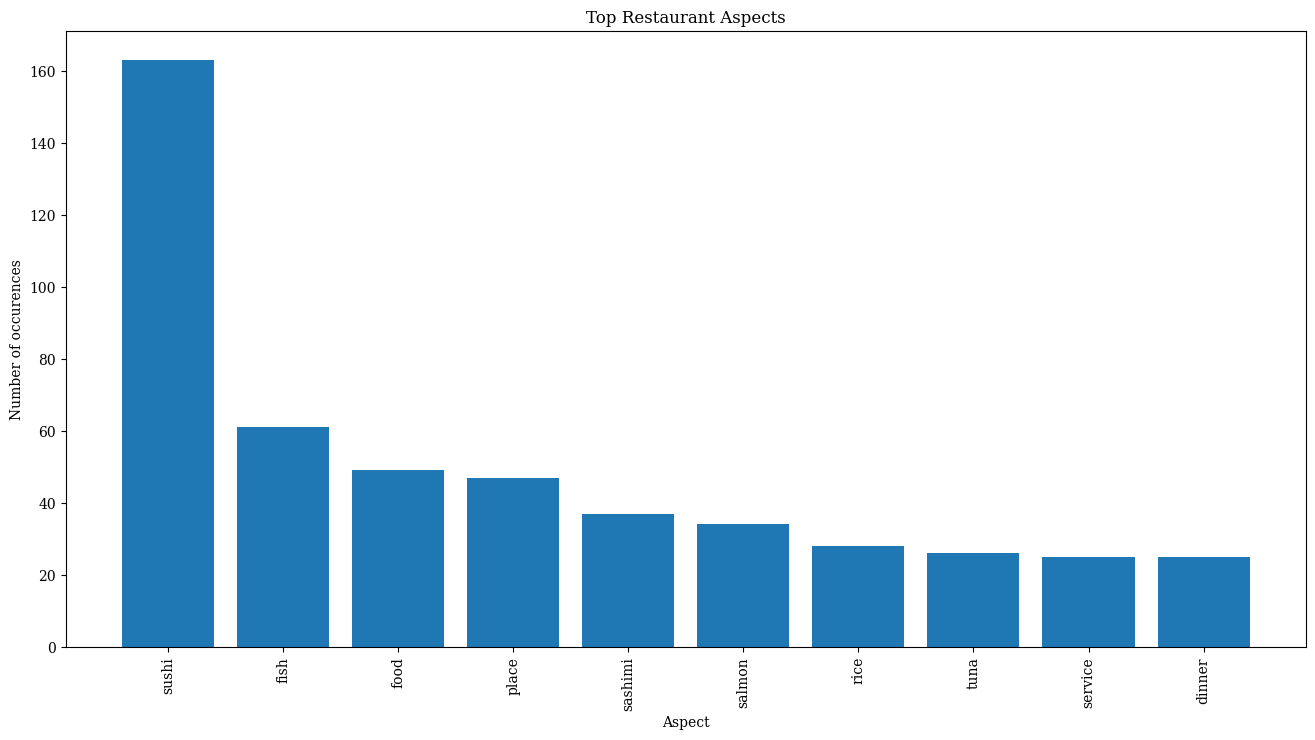

In [27]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top Restaurant Aspects');
ax.set_xlabel('Aspect');
ax.set_ylabel('Number of occurences');
plt.show()

# Wordcloud

/opt/conda/lib/python3.7/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/opt/conda/lib/python3.7/site-packages/wordcloud/stopwords' mode='r' encoding='ANSI_X3.4-1968'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


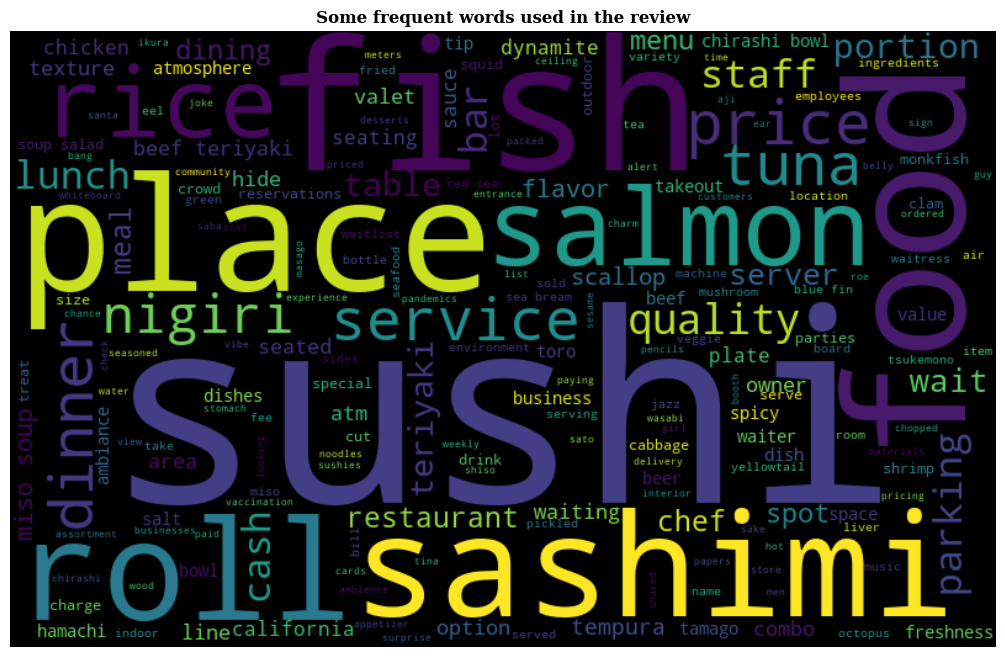

In [28]:
import warnings
from wordcloud import WordCloud
aspects = aspectSentimentTable['aspect'].values.tolist()
all_words = ' '.join([word for word in aspects])
#all_words
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    wordcloud =WordCloud(width=800, height=500, random_state=21).generate(all_words)
    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title("Some frequent words used in the review", weight='bold')
    plt.show()


# Category Classification

Need to break down the aspects into condensed categories. We will use a zero shot classification on a pre-trained model. Need to fine tune the model used and category names. 

In [29]:
# Import the Transformers pipeline library
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-deberta-v3-base',device=0)

/opt/conda/lib/python3.7/site-packages/transformers/convert_slow_tokenizer.py:447: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  "The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option"


In [30]:
# Get all the candidate labels
candidate_labels = ["Food","Service", "Price", "Ambience"]
# Use a dictionary in order to not do repeated work
memoize = {}
label_result = []
condensed_aspects = list(dict.fromkeys(aspects))
result = classifier(condensed_aspects, candidate_labels, multi_label = False)
for item in result:
    memoize[item['sequence']] = item['labels'][0]
for aspect in aspects:
    label_result.append((aspect,memoize[aspect]))
    
    
    

#### Now we have our aspects and corresponding categories

In [31]:
categ_list = []
for aspect,category in label_result:
    categ_list.append(category)
    
# Need to add categories as column to the result_df 
aspectSentimentTable['categ']= categ_list
    
    
    

In [32]:
aspectSentimentTable.head()

,review_idx,sentence_idx,aspect,sentiment,rating,categ
0,0,0,sushi,Positive,5,Food
1,0,0,meal,Positive,5,Food
2,0,1,sushi,Positive,5,Food
3,0,2,waiting,Negative,5,Service
4,0,3,dining room,Negative,5,Ambience


In [33]:
aspectSentimentTable

,review_idx,sentence_idx,aspect,sentiment,rating,categ
0,0,0,sushi,Positive,5,Food
1,0,0,meal,Positive,5,Food
2,0,1,sushi,Positive,5,Food
3,0,2,waiting,Negative,5,Service
4,0,3,dining room,Negative,5,Ambience
...,...,...,...,...,...,...
1116,146,734,fish,Positive,5,Food
1117,146,734,fish market,Neutral,5,Food
1118,147,735,place,Neutral,5,Service
1119,147,736,restaurant,Positive,5,Food


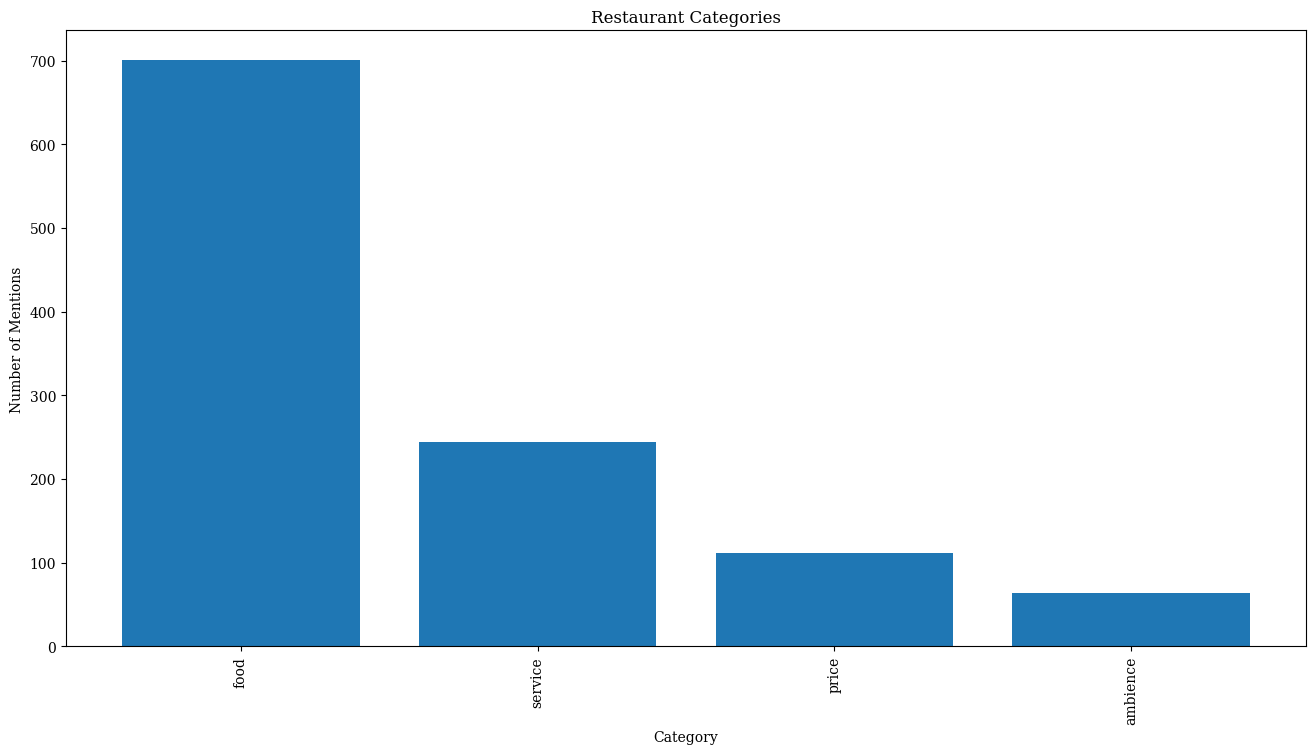

In [34]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=4,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=aspectSentimentTable['categ'])
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Restaurant Categories');
ax.set_xlabel('Category');
ax.set_ylabel('Number of Mentions');
plt.show()

#### Present how many positive on food, how many negative etc. for all categories
#### Present what people with positive reviews had to say that was negative
#### Present what people with negative reviews said that is positive